In [1]:
# Import pandas for building dataframes
import pandas as pd

import sys

# Import numpy
import numpy as np

# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns
# Import datasets for use

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import re
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pylab as pl

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
Xtrain_df = pd.read_csv('X_Train.csv')
Ytrain_df = pd.read_csv('Y_train.csv')
Xtest_df = pd.read_csv('X_test.csv')

X =  pd.read_csv('X_Train.csv')

In [3]:
X['Label'] = Ytrain_df

In [4]:
X['Label'].value_counts()

NO     38400
>5     24870
<30     7966
Name: Label, dtype: int64

In [5]:
X

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,Label
0,122283168,113223627,Caucasian,Female,[80-90),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
1,97835454,25776306,Caucasian,Female,[80-90),?,5,3,17,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
2,431347352,42491844,Caucasian,Male,[50-60),?,3,1,1,1,...,No,Steady,No,No,No,No,No,No,Yes,<30
3,153301914,87104907,Caucasian,Female,[70-80),?,5,3,1,3,...,No,No,No,No,No,No,No,No,No,NO
4,304851608,70844364,Caucasian,Female,[90-100),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,64367586,89250084,Caucasian,Female,[80-90),?,2,1,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
71232,290180694,44177697,Caucasian,Male,[60-70),?,3,1,1,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO
71233,130101072,113734728,Caucasian,Female,[80-90),?,2,3,7,6,...,No,No,No,No,No,No,No,No,No,NO
71234,26933646,107965575,Caucasian,Female,[80-90),?,2,6,20,4,...,No,Steady,No,No,No,No,No,No,Yes,NO


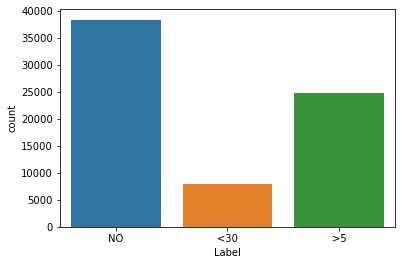

In [6]:
sns.countplot(x='Label', data=X)
plt.show()

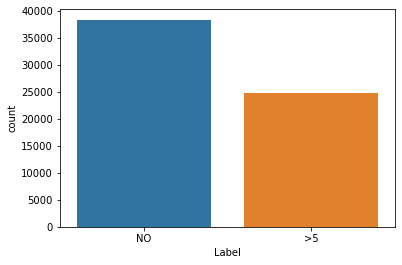

In [7]:
indexNames = X[X['Label'] == "<30"].index
X.drop(indexNames, inplace=True)
sns.countplot(x='Label', data=X)
plt.show()

In [8]:
# temp = X[X['Label'] == '<30']
# rows = temp.sample(frac =0.5) 
# temp = pd.DataFrame(data = rows)

In [9]:
# X = X.append(temp)

In [10]:
# X
# # columnsToDrop = ['glimepiride-pioglitazone','acarbose','metformin-rosiglitazone','metformin-pioglitazone','glipizide-metformin','glyburide-metformin','citoglipton','examide','troglitazone','tolbutamide','acetohexamide','miglitol','tolazamide','chlorpropamide','age group','gender','weight','id', 'patient_no', 'cast', 'admission_typeid','change', 'Med' ,'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses']
# # Xtrain_df.drop(columns =columnsToDrop, inplace = True)

In [11]:
Xtrain_df = X.iloc[:,:-1]
Ytrain_df = X.iloc[:,-1]

In [12]:
# X = pd.DataFrame(data= Xtrain_df)
# X['Label'] = Ytrain_df

# temp = X[X['Label'] == '<30']
# rows = temp.sample(frac =0.5) 
# temp = pd.DataFrame(data = rows)

In [13]:
# X = X.append(temp)
# X['Label'].value_counts()

In [14]:
# Xtrain_df = X.iloc[:,:-1]
# Ytrain_df = X.iloc[:,-1]

In [15]:
# X['Label'].value_counts()

In [16]:
# Ytrain_df.columns = ['label']

In [17]:

labelencoder = LabelEncoder()
for col in Xtrain_df.columns:
    Xtrain_df[col] = labelencoder.fit_transform(Xtrain_df[col])
    Xtest_df[col] = labelencoder.fit_transform(Xtest_df[col])
    

In [18]:
Ytrain_df = pd.DataFrame(data =Ytrain_df )

In [19]:
Ytrain_df

,Label
0,NO
1,NO
3,NO
4,NO
5,>5
...,...
71230,NO
71232,NO
71233,NO
71234,NO


C:\Users\Nadeem Khan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


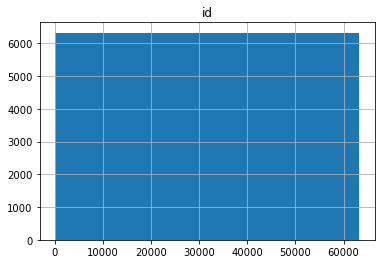

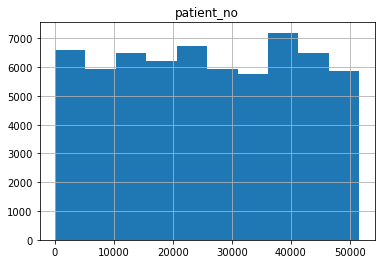

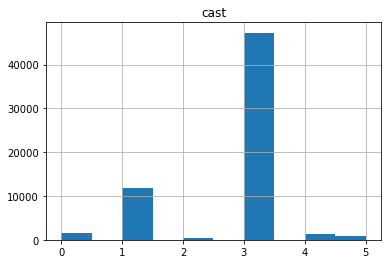

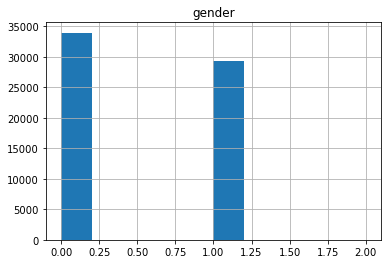

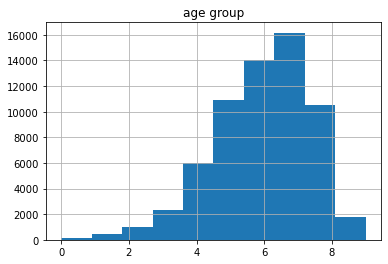

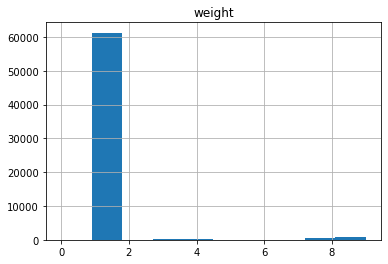

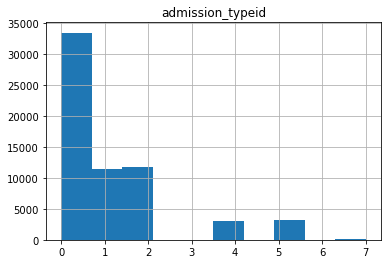

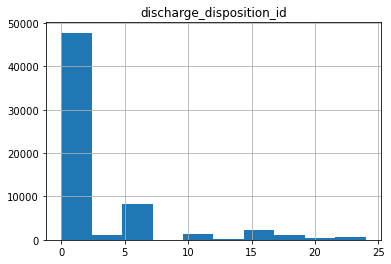

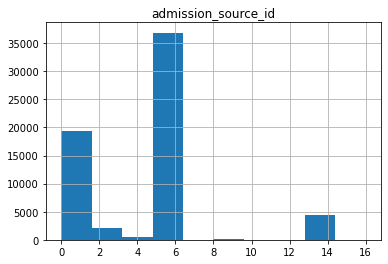

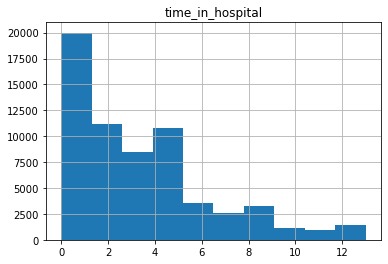

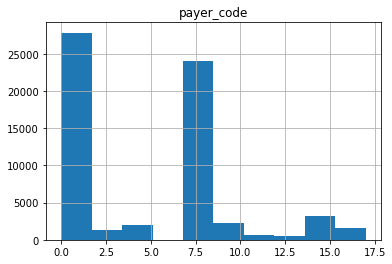

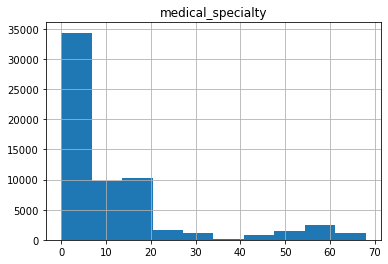

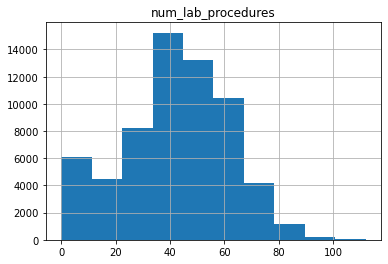

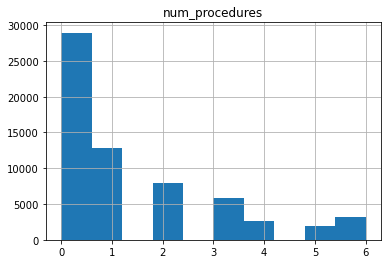

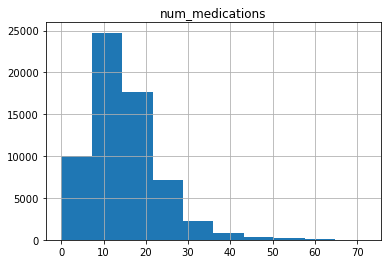

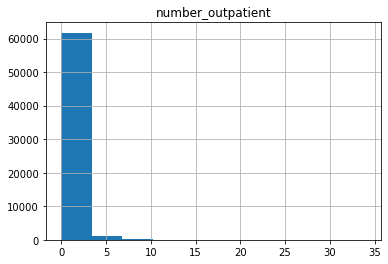

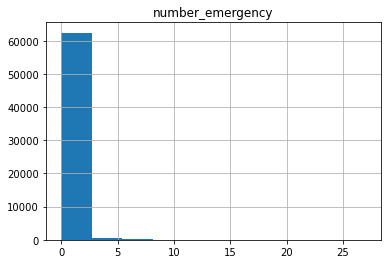

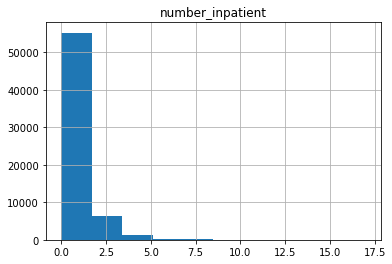

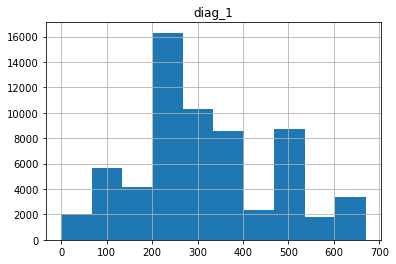

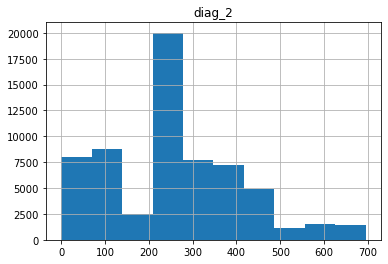

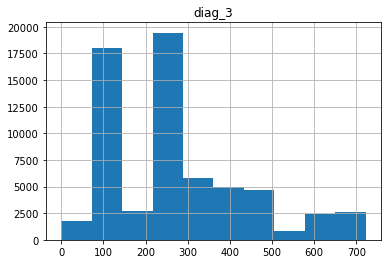

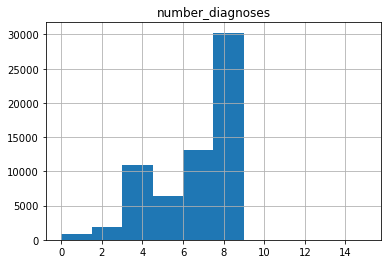

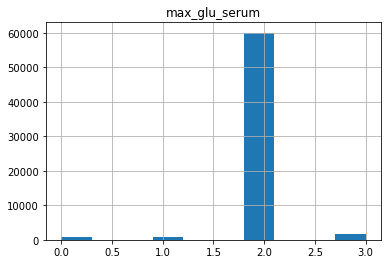

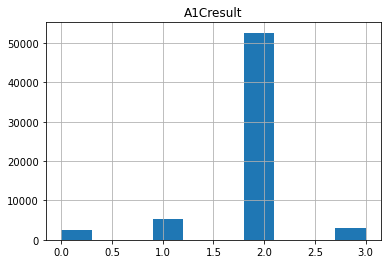

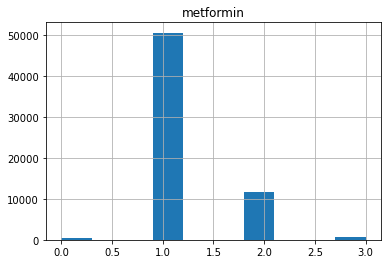

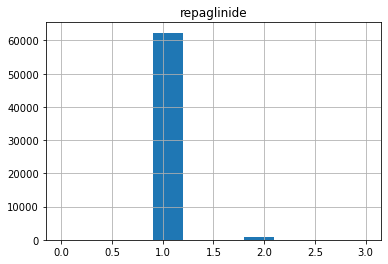

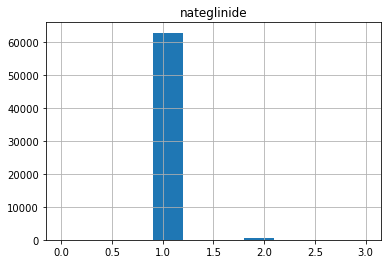

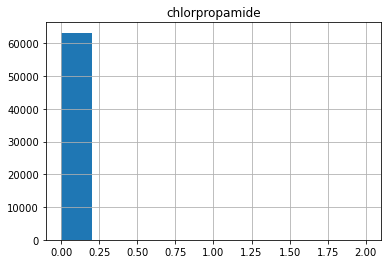

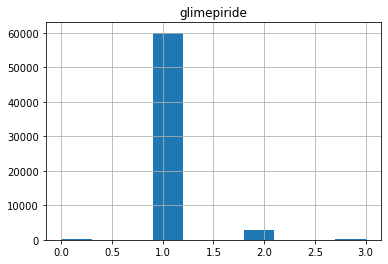

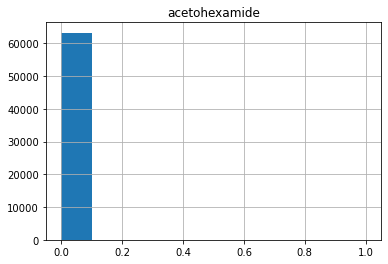

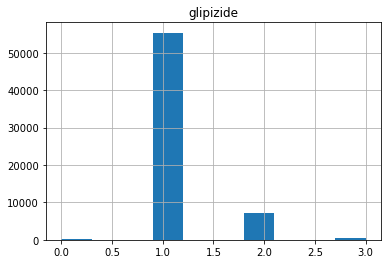

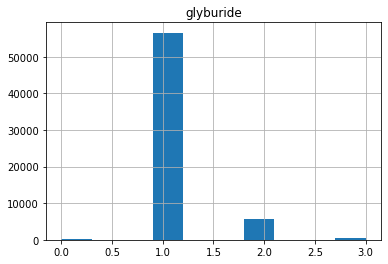

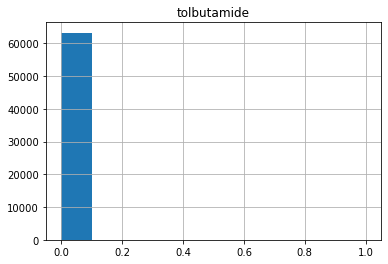

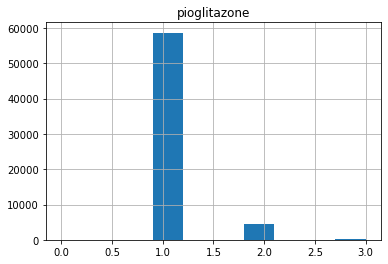

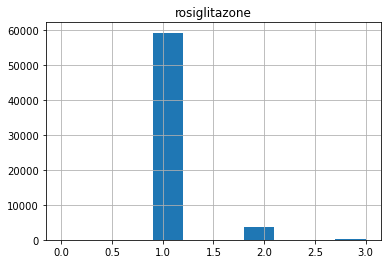

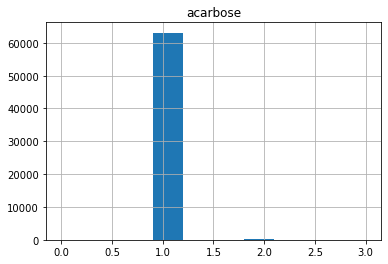

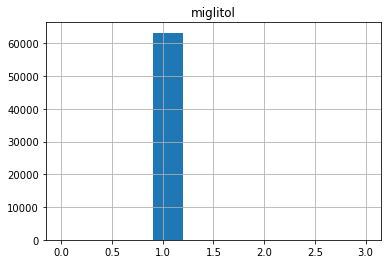

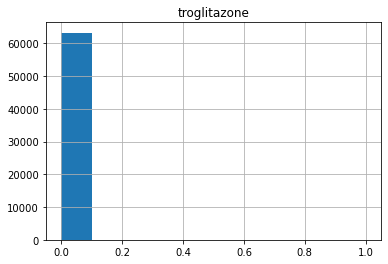

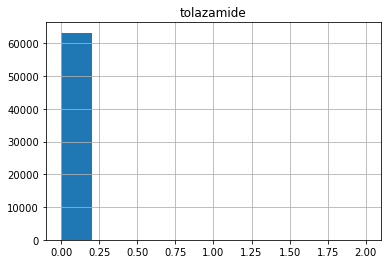

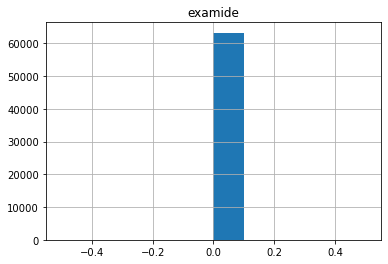

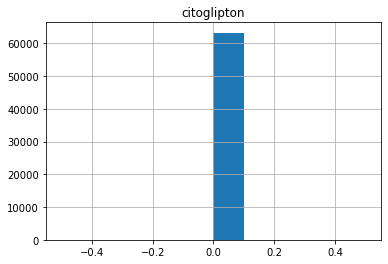

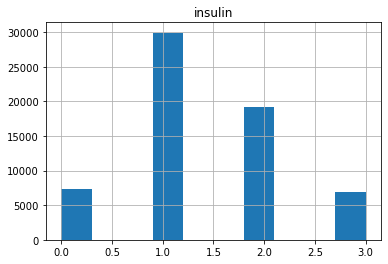

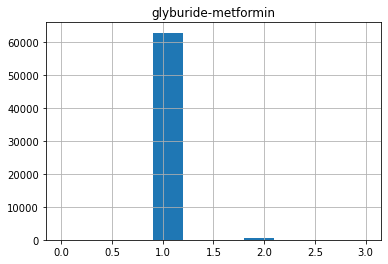

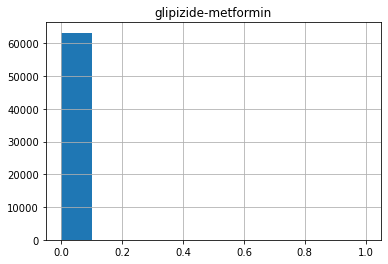

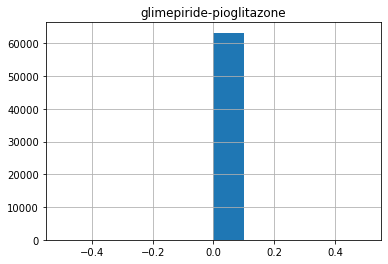

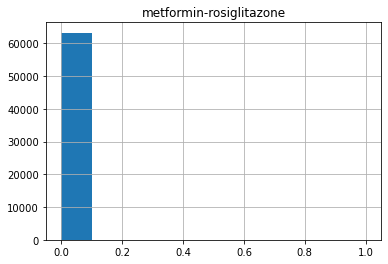

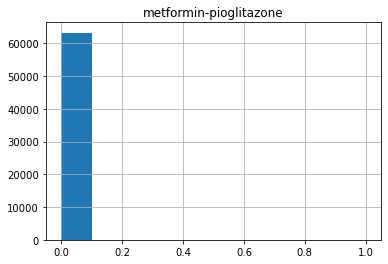

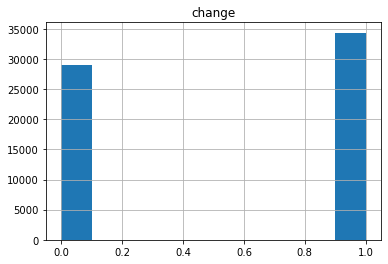

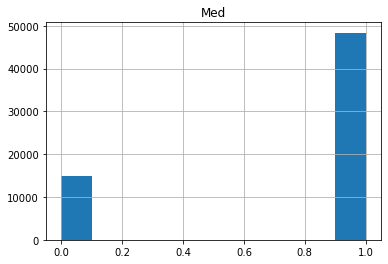

In [20]:
for col in Xtrain_df.columns:
    Xtrain_df.hist(col)

In [21]:
drop_column = ['id', 'patient_no', 'cast', 'gender','weight','admission_typeid', 'discharge_disposition_id', 'admission_source_id','time_in_hospital', 'payer_code','medical_specialty', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'change', 'Med' ] 

In [22]:
# Xtrain_df.drop(columns=drop_column, inplace = True)
# Xtest_df.drop(columns=drop_column, inplace = True)


In [23]:
Ytrain_df['Label'] = labelencoder.fit_transform(Ytrain_df['Label'])

In [24]:
Xtrain_df

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,24273,49006,3,0,8,1,0,0,6,3,...,0,0,1,1,0,0,0,0,1,1
1,18604,17132,3,0,8,1,4,2,13,2,...,0,0,2,1,0,0,0,0,1,1
3,31737,38658,3,0,7,1,4,2,0,2,...,0,0,1,1,0,0,0,0,1,0
4,56568,33274,3,0,9,1,0,2,6,4,...,0,0,2,1,0,0,0,0,1,1
5,35393,47496,3,0,6,1,5,5,6,4,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71230,38689,14093,1,0,6,1,0,0,6,1,...,0,0,1,1,0,0,0,0,1,0
71232,55670,24941,3,1,6,1,2,0,0,3,...,0,0,3,1,0,0,0,0,0,1
71233,26020,49110,3,0,8,1,1,2,6,5,...,0,0,1,1,0,0,0,0,1,0
71234,3118,47617,3,0,8,1,1,5,14,3,...,0,0,2,1,0,0,0,0,1,1


In [25]:
# pca = PCA(n_components = 20)
# x_pca = pd.DataFrame(pca.fit_transform(Xtrain_df))
# xt_pca = pd.DataFrame(pca.fit_transform(Xtest_df))

In [57]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(Xtrain_df, Ytrain_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain_df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score') 
featureScores

,Features,Score
0,num_lab_procedures,667.966427
1,num_medications,382.173471
2,number_diagnoses,421.261698
3,diag_3,435.143073
4,diag_2,49.535236
5,diag_1,84.337133
6,age group,17.317122


In [27]:
Xtrain_df = Xtrain_df[['num_lab_procedures', 'num_medications', 'number_diagnoses', 'diag_3', 'diag_2', 'diag_1', 'age group']]
Xtest_df =  Xtest_df[['num_lab_procedures', 'num_medications', 'number_diagnoses', 'diag_3', 'diag_2', 'diag_1', 'age group']]
Xtrain_df

,num_lab_procedures,num_medications,number_diagnoses,diag_3,diag_2,diag_1,age group
0,43,14,5,75,230,249,8
1,14,19,7,630,630,546,8
3,51,13,8,250,292,324,7
4,61,11,8,240,42,385,9
5,65,15,5,240,292,262,6
...,...,...,...,...,...,...,...
71230,42,7,2,228,67,361,6
71232,22,7,4,122,67,590,6
71233,69,22,8,301,340,385,8
71234,60,17,6,249,90,382,8


In [28]:
bool_series = pd.notnull(Xtrain_df["age group"])
bool_series.value_counts()

True    63270
Name: age group, dtype: int64

In [29]:
x = Xtrain_df.to_numpy()
y = Ytrain_df.to_numpy()

In [30]:
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=65)

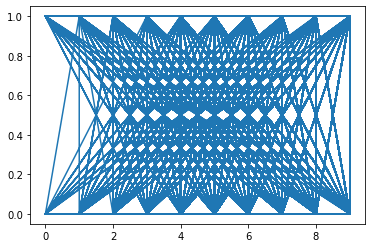

In [31]:
plt.plot(Xtrain_df["age group"], y)

In [203]:
RFC = RandomForestClassifier(n_estimators=150, max_features=2, max_depth=20, min_samples_leaf=2)
NB =  GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=4)
MLP = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
DT = DecisionTreeClassifier( criterion='entropy')
LR = LogisticRegression( multi_class='multinomial')

In [204]:
# RFC_Model = RFC.fit(x, y).predict(Xtest_df)
# LR_Model = LR.fit(x, y).predict(Xtest_df)
# NB_Model = NB.fit(x, y).predict(Xtest_df)
# DT_Model = DT.fit(x, y).predict(Xtest_df)
# MLP_Model = MLP.fit(x, y).predict(Xtest_df)



In [205]:
# final_predictions = list()
# for i in range(0,30530):
#     final_predictions.append(max(int(RFC_Model[i]),int(LR_Model[i]),int(NB_Model[i]),int(DT_Model[i]), int(MLP_Model[i])))

In [206]:
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

In [207]:
MLP.fit(x, y.ravel()) 
Ytest = MLP.predict(Xtest_df)
MLP.score(x, y)

0.6082977714556662

In [176]:
# from sklearn.metrics import accuracy_score
# accuracy_score(Y_test, Ytest)

In [177]:
# Ytest = final_predictions

In [178]:
Ytest = labelencoder.inverse_transform(Ytest)

In [179]:
Ytest

array(['NO', '>5', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [180]:
result_df = pd.DataFrame(data = Ytest , columns = ['label'] )

In [181]:
id = pd.DataFrame(data =range(1,len(result_df)+1), columns = ['Id'] )

In [182]:
save = pd.DataFrame()

In [183]:
save["id"] = id['Id']

In [184]:
save["label"] = result_df['label']

In [185]:
save

,id,label
0,1,NO
1,2,>5
2,3,NO
3,4,>5
4,5,NO
...,...,...
30525,30526,>5
30526,30527,>5
30527,30528,NO
30528,30529,NO


In [186]:
save.to_csv("results.csv",index=False)

In [187]:
save.shape

(30530, 2)